## Bloom Filter

In [1]:
from tqdm import tqdm
import math
import mmh3
import random

class BloomFilter:
    def __init__(self, capacity, fp_prob):
        self.capacity = capacity
        self.fp_prob = fp_prob
        self.bitarray = 0
        self.n_bits = math.ceil(-math.log(fp_prob,math.e) * capacity / (math.log(2,math.e)**2))
        self.n_hashs = int(self.n_bits / capacity * math.log(2,math.e))
        self.seeds = [random.randint(0,999999) for i in range(self.n_hashs)]
    
    def put(self, item):
        for i in range(self.n_hashs):
            pos = mmh3.hash(item,self.seeds[i]) % self.n_bits
            self.bitarray |= (1 << pos)
                
    def test(self, item):
        for i in range(self.n_hashs):
            pos = mmh3.hash(item,self.seeds[i]) % self.n_bits
            
            if self.bitarray & (1 << pos) == 0:
                return False
            
        return True


cnt_l = []
for r in tqdm([round(0.1+0.05*i,2) for i in range(19)]): # 0.1부터 1까지
    capacity = 100000
    bloom = BloomFilter(capacity,r)

    # put
    for i in range(capacity):
        bloom.put(str(i))

    # test
    cnt = 0
    for i in range(capacity+1,capacity*2):
        if bloom.test(str(i)):
            cnt += 1
    
    cnt_l.append(cnt)

100%|██████████████████████████████████████████████████████████████████████████████████| 19/19 [00:13<00:00,  1.44it/s]


- Bloom Filter의 false positive 비율 확인

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
# 배경색 흰색으로 맞춰줌
mpl.rc('figure', facecolor = 'w', edgecolor ='w')

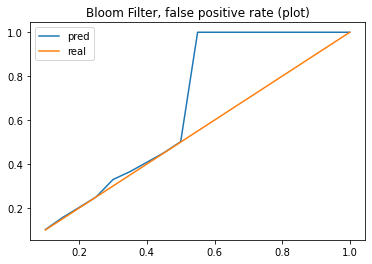

In [3]:
plt.plot([round(0.1+0.05*i,2) for i in range(19)],[(i/capacity) for i in cnt_l], label='pred')
plt.plot([round(0.1+0.05*i,2) for i in range(19)],[round(0.1+0.05*i,2) for i in range(19)], label = 'real')
plt.title('Bloom Filter, false positive rate (plot)')
plt.legend()
plt.savefig('./bloom plot.png')
plt.show()

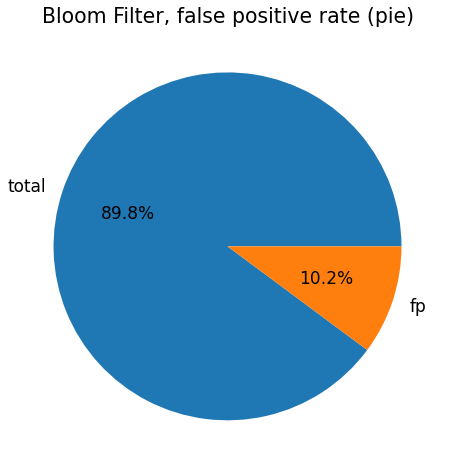

In [4]:
# 그래프로 확인 / 0.1일 때
plt.figure(figsize=(25, 8))
plt.rc('font', size=17)
plt.pie([capacity-cnt_l[0], cnt_l[0]], labels=['total', 'fp'], autopct='%.1f%%')
plt.title('Bloom Filter, false positive rate (pie)')
plt.savefig('./bloom pie.png')
plt.show()